In [19]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

# %matplotlib inline

In [20]:
beer = pd.read_csv("../data/5-1-1-beer.csv")
print(beer.head())

   beer  temperature
0  45.3         20.5
1  59.3         25.0
2  40.4         10.0
3  38.0         26.9
4  37.0         15.8


In [21]:
lm_model = smf.ols(formula = "beer ~ temperature", data=beer).fit()

In [22]:
print(lm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Thu, 25 Aug 2022   Prob (F-statistic):           1.11e-05
Time:                        22:45:44   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      

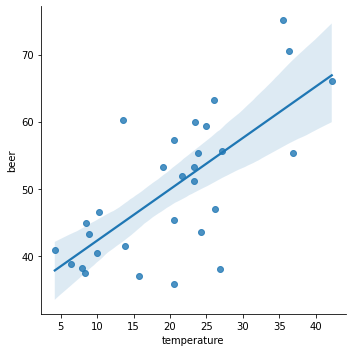

In [23]:
# TODO confidnence interval shape
sns.lmplot(x="temperature", y="beer", data=beer)
plt.show()

references: 

[1] 파이썬으로 배우는 통계학 교과서; 바바 신야 지음, 윤옹식 옮김; 한빛미디어 (2020)

## Standard errors, Standard deviation, and Confidence interval

In [24]:
print(lm_model.params)
print()
print(lm_model.conf_int())
print()
print("standard errors")
print(lm_model.bse)
print()
print("standard deviation")
print(lm_model.bse * np.sqrt(len(beer['beer'])))

Intercept      34.610215
temperature     0.765428
dtype: float64

                     0          1
Intercept    27.983920  41.236510
temperature   0.471458   1.059397

standard errors
Intercept      3.234852
temperature    0.143511
dtype: float64

standard deviation
Intercept      17.718016
temperature     0.786044
dtype: float64


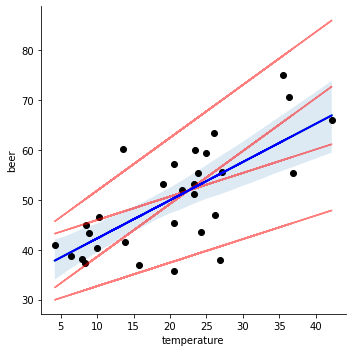

In [25]:
sns.lmplot(x="temperature", y="beer", data=beer, scatter=False)
plt.scatter(beer['temperature'], beer['beer'], label='Observed', marker='o', color='black')

a_ci0 = lm_model.conf_int()[0]['temperature']
b_ci0 = lm_model.conf_int()[0]['Intercept']

a_ci1 = lm_model.conf_int()[1]['temperature']
b_ci1 = lm_model.conf_int()[1]['Intercept']

a_ci_list = [a_ci0, a_ci1]
b_ci_list = [b_ci0, b_ci1]
for a_ci in a_ci_list:
    for b_ci in b_ci_list:
        lm_predict = b_ci + a_ci * beer['temperature'] 
        plt.plot(beer['temperature'], lm_predict, 'r', alpha=0.5)

a = lm_model.params['temperature']
b = lm_model.params['Intercept']
lm_predict = b + a * beer['temperature'] 
plt.plot(beer['temperature'], lm_predict, 'b')

plt.show()

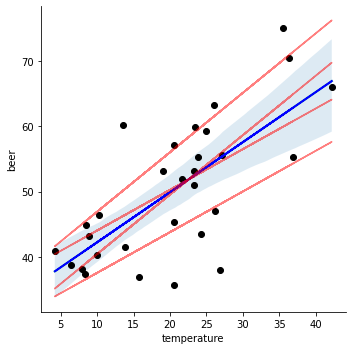

In [26]:
sns.lmplot(x="temperature", y="beer", data=beer, scatter=False)
plt.scatter(beer['temperature'], beer['beer'], label='Observed', marker='o', color='black')

a = lm_model.params['temperature']
b = lm_model.params['Intercept']
lm_predict = b + a * beer['temperature'] 
plt.plot(beer['temperature'], lm_predict, 'b')

a_temp = lm_model.bse['temperature']
b_temp = lm_model.bse['Intercept']

a_bse_list = [-a_temp, a_temp]
b_bse_list = [-b_temp, b_temp]
for a_bse in a_bse_list:
    for b_bse in b_bse_list:
        lm_predict_bse = b + b_bse + (a + a_bse) * beer['temperature'] 
        plt.plot(beer['temperature'], lm_predict_bse, 'r', alpha=0.5)

plt.show()

references: 

[2] https://stats.stackexchange.com/questions/85560/shape-of-confidence-interval-for-predicted-values-in-linear-regression

[3] https://people.duke.edu/~rnau/mathreg.htm

## Confidence Interval and Prediction Interval - Part 1

#### Confidence Interval [4]

- True conditional mean

$m(x) \equiv \mathbb{E}[Y|X=x] = \beta_0 + \beta_1 x$

- Estimate of conditional mean

$\hat{m}(x) = \hat{\beta_0} + \hat{\beta_1}x$

$\hat{m}(x) = \hat{\beta_0} + \hat{\beta_1}x + {1\over{n}} \sum_{i=1}^n(1 + (x-\bar{x}) {x_i - \bar{x}\over{s_X^2}})\epsilon_i$

$\mathbb{E}[\hat{m}(x)] = \hat{\beta_0} + \hat{\beta_1}x = m(x)$

$Var[\hat{m}(x)] = {\sigma^2 \over{n}}(1+{(x-\bar{x})^2 \over{s_X^2}})$

$\hat{m}(x) \sim N(m(x), {\sigma^2 \over{n}}(1+{(x-\bar{x})^2 \over{s_X^2}}))$

#### Predictive Interval [4]

$Y|X = x \sim N(m(x), \sigma^2)$

$N(m(x), \sigma^2) = m(x) + N(0, \sigma^2)$

$= \hat{m}(x) + N(0, {\sigma^2 \over{n}}(1+{(x-\bar{x})^2 \over{s_X^2}}) + N(0, \sigma^2)$

$= \hat{m}(x) + N(0, \sigma^2(1 + {1\over{n}} + {(x-\bar{x})^2 \over{n s_X^2}}))$

referenes: 

[4] The Truth about Linear Regression; Cosma Rohilla Shalizi; 2019; Chapter 8 - Predictive Inference for the Simple Linear Model 

In [27]:
# TODO Confidence Interval Equation / Prediction Interval Equation
x = beer['temperature']
y_err_ci = x.std() * np.sqrt(1 / len(x) + (x - x.mean()) ** 2 / np.sum((x - x.mean()) ** 2))
y_err_pi = x.std() * np.sqrt(1 + 1 / len(x) + (x - x.mean()) ** 2 / len(x) / np.sum((x - x.mean()) ** 2))

print(f"type(beer['beer'])       : {type(beer['beer'])}")
print(f"type(beer['temperature']): {type(beer['temperature'])}")
print(f"type(lm_predict)         : {type(lm_predict)}")
print(f"type(y_err_ci)           : {type(y_err_ci)}")
print(f"type(y_err_pi)           : {type(y_err_pi)}")

type(beer['beer'])       : <class 'pandas.core.series.Series'>
type(beer['temperature']): <class 'pandas.core.series.Series'>
type(lm_predict)         : <class 'pandas.core.series.Series'>
type(y_err_ci)           : <class 'pandas.core.series.Series'>
type(y_err_pi)           : <class 'pandas.core.series.Series'>


In [28]:
data = {'temperature': beer['temperature'],
        'beer': beer['beer'],
        'lm_predict': lm_predict,
        'y_err_ci': y_err_ci,
        'y_err_pi': y_err_pi}

lm_beer = pd.DataFrame(data)
print(lm_beer.head())

   temperature  beer  lm_predict  y_err_ci   y_err_pi
0         20.5  45.3   50.301481  1.800246  10.022146
1         25.0  59.3   53.745905  1.996425  10.023385
2         10.0  40.4   42.264491  2.633247  10.028286
3         26.9  38.0   55.200217  2.172442  10.024605
4         15.8  37.0   46.703971  1.988464  10.023332


In [29]:
lm_beer = lm_beer.sort_values('temperature')
print(lm_beer.head())

    temperature  beer  lm_predict  y_err_ci   y_err_pi
5           4.2  40.9   37.825011  3.497712  10.037090
29          6.4  38.8   39.508952  3.154448  10.033298
23          7.9  38.2   40.657093  2.930021  10.031029
14          8.4  37.4   41.039807  2.857330  10.030330
9           8.5  44.9   41.116350  2.842932  10.030194


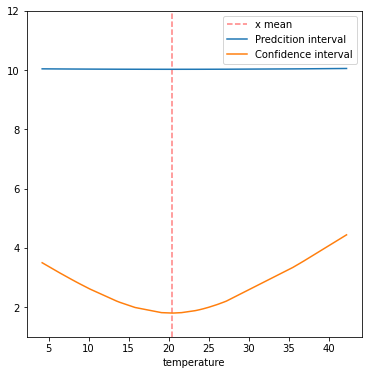

In [30]:
plt.figure(figsize=(6, 6))

yrange = [1, 12]
x_mean = lm_beer['temperature'].mean()
plt.plot([x_mean, x_mean], yrange,
         linestyle='dashed', color='red', alpha=0.5, label='x mean')

plt.plot(lm_beer['temperature'], lm_beer['y_err_pi'], label='Predcition interval')
plt.plot(lm_beer['temperature'], lm_beer['y_err_ci'], label='Confidence interval')

plt.xlabel('temperature')
plt.ylim(yrange)
plt.legend()
plt.show()

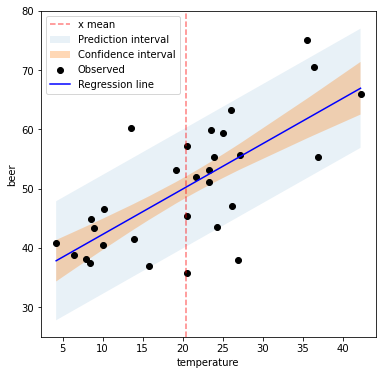

In [31]:
plt.figure(figsize=(6, 6))

yrange = [25, 80]
x_mean = lm_beer['temperature'].mean()
plt.plot([x_mean, x_mean], yrange,
         linestyle='dashed', color='red', alpha=0.5, label='x mean')

plt.fill_between(lm_beer['temperature'], 
                 lm_beer['lm_predict'] - lm_beer['y_err_pi'], 
                 lm_beer['lm_predict'] + lm_beer['y_err_pi'], 
                 alpha=0.1, label='Prediction interval')

plt.fill_between(lm_beer['temperature'], 
                 lm_beer['lm_predict'] - lm_beer['y_err_ci'], 
                 lm_beer['lm_predict'] + lm_beer['y_err_ci'], 
                 alpha=0.3, label='Confidence interval')

plt.scatter(lm_beer['temperature'], lm_beer['beer'], 
            marker='o', color='black', label='Observed')

plt.plot(lm_beer['temperature'], lm_beer['lm_predict'], 
         color='blue', label='Regression line')

plt.xlabel('temperature')
plt.ylabel('beer')
plt.ylim(yrange)
plt.legend()
plt.show()

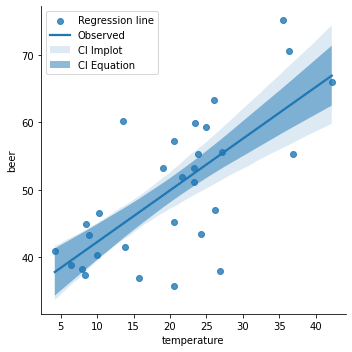

In [32]:
sns.lmplot(x="temperature", y="beer", data=beer)

plt.fill_between(lm_beer['temperature'], 
                 lm_beer['lm_predict'] - lm_beer['y_err_ci'], 
                 lm_beer['lm_predict'] + lm_beer['y_err_ci'], 
                 alpha=0.5)

plt.legend(labels=['Regression line', 'Observed', 'CI lmplot', 'CI Equation'])
plt.show()

references: 

[5] https://matplotlib.org/3.1.3/gallery/lines_bars_and_markers/fill_between_demo.html#sphx-glr-gallery-lines-bars-and-markers-fill-between-demo-py

## Confidence Interval and Prediction Interval - Part 2

1. Confidence interval: 모델의 파라미터 변동을 고려한 신뢰구간 ($y=ax+b$ 라고 했을때 $a, b$)

2. Prediction interval: 모델이 예측하는 값에 대한 예측 구간

In [33]:
alpha = 0.5
# predictions = lm_model.get_prediction(beer['temperature']).summary_frame(alpha)
predictions = lm_model.get_prediction(beer['temperature']).summary_frame()

In [34]:
predictions['temperature'] = beer['temperature']
print(predictions.head())

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  50.301481  1.391287      47.451558      53.151404     34.435620   
1  53.745905  1.542901      50.585416      56.906394     37.821328   
2  42.264491  2.035057      38.095866      46.433116     26.109588   
3  55.200217  1.678933      51.761080      58.639355     39.218004   
4  46.703971  1.536748      43.556085      49.851857     30.781891   

   obs_ci_upper  temperature  
0     66.167341         20.5  
1     69.670482         25.0  
2     58.419394         10.0  
3     71.182430         26.9  
4     62.626052         15.8  


In [35]:
predictions = predictions.sort_values('temperature')
print(predictions.head())

         mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
5   37.825011  2.703143      32.287874      43.362149     21.264113   
29  39.508952  2.437858      34.515227      44.502677     23.121739   
23  40.657093  2.264413      36.018652      45.295534     24.374630   
14  41.039807  2.208235      36.516442      45.563172     24.789752   
9   41.116350  2.197109      36.615777      45.616923     24.872624   

    obs_ci_upper  temperature  
5      54.385910          4.2  
29     55.896165          6.4  
23     56.939556          7.9  
14     57.289862          8.4  
9      57.360075          8.5  


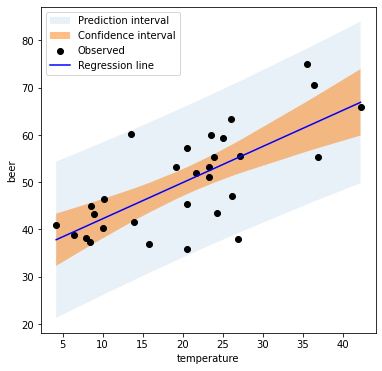

In [36]:
plt.figure(figsize=(6, 6))
plt.fill_between(predictions['temperature'], predictions['obs_ci_lower'], predictions['obs_ci_upper'], 
                 alpha=.1, label='Prediction interval')
plt.fill_between(predictions['temperature'], predictions['mean_ci_lower'], predictions['mean_ci_upper'], 
                 alpha=.5, label='Confidence interval')
plt.scatter(beer['temperature'], beer['beer'], marker='o', color='black', label='Observed')
plt.plot(predictions['temperature'], predictions['mean'], color='blue', label='Regression line')

plt.xlabel('temperature')
plt.ylabel('beer')
plt.legend()
plt.show()

references: 

[6] https://lmc2179.github.io/posts/confidence_prediction.html